![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head(10)

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.000000
1,5342103,"NO!, Let him, we need a Conservative government.",0.000000
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.200000
3,551008,"As always, yours is dripping with sarcasm, whi...",0.000000
4,865998,The dirty little secret is that the price rang...,0.300000
5,5790966,"Light gets bent by gravity. However, it isn't...",0.000000
6,5241987,"This is a bad joke, we rewrite history every t...",0.000000
7,6116383,If some homeless actually live peacefully toge...,0.000000
8,653122,Thanks. I will.,0.166667
9,5439407,Okay.....Should we not be investigating Eric H...,0.500000


In [ ]:
df.shape

(541462, 3)

In [ ]:
# Filtrar las filas donde el valor en la columna 'target' es mayor que 0.5
filtered_data = df[df['target'] > 0.5]

# Mostrar las columnas 'id', 'comment_text' y 'target'
result = filtered_data[['id', 'comment_text', 'target']]
result.head()

,id,comment_text,target
13,5303644,You don't care whether Alaska educates its chi...,0.906250
17,916947,"Ah, Barney is racist' eh Alceste. Your name ca...",0.600000
135,485567,The shooter was a black cop and the felon was ...,0.825000
142,5558118,Just build Harpo's firewall and let Montana ha...,0.623188
199,6018073,B.S. Taking a knee disrespects everyone who d...,1.000000


<Axes: >

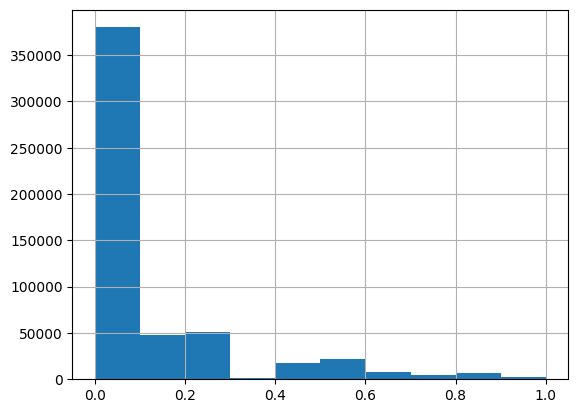

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
y

0         0.000000
1         0.000000
2         0.200000
3         0.000000
4         0.300000
            ...   
541457    0.000000
541458    0.200000
541459    0.000000
541460    0.000000
541461    0.514286
Name: target, Length: 541462, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
X

0         What are you talking about? What group do Pete...
1          NO!, Let him, we need a Conservative government.
2         Perhaps he took the "power out of the Cardinal...
3         As always, yours is dripping with sarcasm, whi...
4         The dirty little secret is that the price rang...
                                ...                        
541457    You wrote: "Both parties campaigned explicitly...
541458    Nowadays. there sure seem to be a lot of credi...
541459    We are lucky wealth filters down to the poor i...
541460    You are half right. Both nature and humans can...
541461    I don't know how you went from yelling at a fo...
Name: comment_text, Length: 541462, dtype: object

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Para comparar las métricas de cada modelo

MSE = {}
Accuracy = {}
AUC = {}

In [ ]:
#"target" tiene valores continuos en lugar de etiquetas discretas (0 y 1)
#Se necesita convertir en etiquetas antes de entrenar el modelo
#Se aplica un umbral para convertir la columna "target" en clases binarias (0 y 1)
#Para la evaluación, los ejemplos de conjuntos de prueba con se considerarán en la clase positiva (tóxico). comment_texttargettargettarget >= 0.5

# Convierta la columna "target" en clases binarias: 1 -> es toxico y 0 -> no toxico
y_train_binary = (y_train >= 0.5).astype(int)
y_test_binary = (y_test >= 0.5).astype(int)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

#### La función **CountVectorizer** toma una colección de texto y crea un vocabulario de palabras conocidas, luego codifica cada documento de texto como un vector numérico en función de la frecuencia de las palabras en el documento.

In [ ]:
# Celda 1
# Crear el objeto CountVectorizer y ajuste a los datos de entrenamiento
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba con el vectorizador ajustado
X_test_vectorized = vectorizer.transform(X_test)

# Crear el modelo de regresión logística y entrene con los datos de entrenamiento vectorizados
logreg = LogisticRegression()
logreg.fit(X_train_vectorized, y_train_binary)

# Predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test_vectorized)

# Calcule el error cuadrático medio
MSECountVect = mean_squared_error(y_test_binary, y_pred)
print("MSE:", MSECountVect)
#Arreglo para acumular las medidas para comparar al final
MSE['Mod CountVect'] = MSECountVect

MSE: 0.05787903717757145


In [ ]:
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy: ", accuracy)
Accuracy['Mod CountVect'] = accuracy


# Calcular el AUC-ROC
probabilities = logreg.predict_proba(X_test_vectorized)
auc = roc_auc_score(y_test_binary, probabilities[:, 1])
print("AUC-ROC es: ", auc)
AUC['Mod CountVect'] = auc


Accuracy:  0.9421209628224285
AUC-ROC es:  0.9059357792437206


### *Observaciones*:
- un MSE de 0.0579 sugiere que el modelo tiene un rendimiento razonablemente bueno en la clasificación de comentarios tóxicos en el conjunto de datos de prueba

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2

# Crear el objeto CountVectorizer y ajuste a los datos de entrenamiento
vectorizer_trig = CountVectorizer(ngram_range=(3, 3))
X_train_vectorized_trig = vectorizer_trig.fit_transform(X_train)
#362.770 y 1.0546378


# Transformar los datos de prueba con el vectorizador ajustado

X_test_vectorized_trig = vectorizer_trig.transform(X_test)

# Crear el modelo de regresión logística y entrene con los datos de entrenamiento vectorizados
logreg_trig = LogisticRegression()
logreg_trig.fit(X_train_vectorized_trig, y_train_binary)

# Predicciones en el conjunto de prueba
y_pred_trig = logreg_trig.predict(X_test_vectorized_trig)

# Calcule el error cuadrático medio
MSECountVect_trig = mean_squared_error(y_test_binary, y_pred_trig)
print("MSE_Trigrama es:", MSECountVect_trig)
#Arreglo para acumular las medidas para comparar al final
MSE['Mod Trigrama'] = MSECountVect_trig

MSE_Trigrama es: 0.0787763805174527


In [ ]:
# Calcular la precisión (accuracy)
accuracy_trig = accuracy_score(y_test_binary, y_pred_trig)
print("Accuracy_Trigrama es: ", accuracy_trig)
Accuracy['Mod Trigrama'] = accuracy_trig


# Calcular el AUC-ROC
probabilities_trig = logreg_trig.predict_proba(X_test_vectorized_trig)
auc_trig = roc_auc_score(y_test_binary, probabilities_trig[:, 1])
print("AUC-ROC es: ", auc_trig)
AUC['Mod Trigrama'] = auc_trig




Accuracy_Trigrama es:  0.9212236194825473
AUC-ROC es:  0.6952459942936833


A pesar de que podemos evidenciar que el accuracy del modelo con un trigrama es alto con un 0,92%, el AUC es de tan dolo un 0,69, es decir, que el modelo no esta clasificando muy bien cuando un comentario es Tóxico o no. 

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Funcionalidad de TfidfVectorizer
Es una herramienta de procesamiento de lenguaje natural que se utiliza para convertir un corpus de texto (conjunto completo de documentos de texto) en una matriz de términos-documentos. Utiliza un esquema de ponderación conocido como TF-IDF (Term Frequency-Inverse Document Frequency), que es una medida estadística que refleja la importancia de una palabra en función de la frecuencia de aparición y la frecuencia inversa de documento.

La frecuencia de aparición se refiere al número de veces que una palabra aparece en un documento, mientras que la frecuencia inversa de documento es una medida de que tan común es la palabra en todo el corpus. En resumen, la función TfidfVectorizer da más peso a las palabras que aparecen con frecuencia en un documento específico pero son poco frecuentes en todo el corpus.

Como resultado se obtine una matriz de términos-documentos que contiene una fila para cada documento del corpus y una columna para cada palabra distinta y cada celda de la matriz representa la importancia de esa palabra en ese documento específico.

Vale agregar que TfidfVectorizer es muy útil en tareas de clasificación, ya es muy bueno identificando palabras clave.

En cuanto a las ventajas y desventajas de TfidfVectorizer en comparación con CountVectorizer, se debe destacar que cada uno es pertinente dependiendo de el problema a solucionar y de la estructura de los datos a analizar. Un ejemplo de lo anterior es cuando se quiere dar peso a las palabras por su frecuencia (eg. midiendo tendencias), para esto TfidfVectorizer no sería la elección adecuada ya que le da menos importancia a palabras frecuentes en general. 

En cuanto a la comparación con CountVectorizer a continuación se listan las ventajas y desventajas: 

#Ventajas de TfidfVectorizer:

- A diferencia de CountVectorizer cuenta la frecuencia de las palabras en todo el corpus, tiene en cuenta la frecuencia de aparición de las palabras en un documento y su frecuencia inversa en todo el corpus, lo que significa que las palabras más importantes en un documento tienen un mayor peso en la matriz de términos-documentos.
- Le da menos peso a las palabras que aparecen con frecuencia en todo el corpus, como los artículos o las preposiciones, que no suelen ser muy útiles.
- Permite identificar con mayor precisión las palabras clave que caracterizan un documento.

#Desventajas de TfidfVectorizer:

- Puede tener problemas con términos raros o poco frecuentes y darles demasiada importancia en la matriz de términos-documentos.
- No tiene en cuenta la proximidad entre las palabras en un documento, lo que es importante para la comprensión del texto como un todo.
- En cuanto a rendimiento, es más lento y requiere más recursos computacionales debido a la mayor complejidad del cálculo de los pesos.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
# Crear el vectorizador Tfidf
vectorizer = TfidfVectorizer()

# Ajustar y transformar los datos de entrenamiento con el vectorizador Tfidf
X_train_vectorized_tif = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba con el vectorizador Tfidf ajustado
X_test_vectorized_tif = vectorizer.transform(X_test)

# Crear el modelo de regresión logística y entrenar con los datos de entrenamiento vectorizados
logreg_tif = LogisticRegression()
logreg_tif.fit(X_train_vectorized_tif, y_train_binary)

# Predicciones en el conjunto de prueba
y_pred_tif = logreg_tif.predict(X_test_vectorized_tif)

# Calcular el error cuadrático medio
MSETfidf = mean_squared_error(y_test_binary, y_pred_tif)
print("MSE:", MSETfidf)

# Agregar la medida de error al diccionario para comparar con otras medidas
MSE['Mod Tfidf'] = MSETfidf

MSE: 0.056686981973662856


In [ ]:
accuracy_tif = accuracy_score(y_test_binary, y_pred_tif)
print("Accuracy Tfidfvectorizer: ", accuracy_tif)
Accuracy['Mod Tfidf'] = accuracy_tif


# Calcular el AUC-ROC
probabilities_tif = logreg_tif.predict_proba(X_test_vectorized_tif)
auc_tif = roc_auc_score(y_test_binary, probabilities_tif[:, 1])
print("AUC-ROC es: ", auc_tif)
AUC['Mod Tfidf'] = auc_tif

Accuracy Tfidfvectorizer:  0.9433130180263372
AUC-ROC es:  0.9377447460057425


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

##**La métrica del error cuadrático medio (MSE)**
##un MSE más bajo indica un mejor rendimiento del modelo, ya que las diferencias entre las predicciones y los valores reales son menores. Un MSE ##de 0 implicaría predicciones perfectas

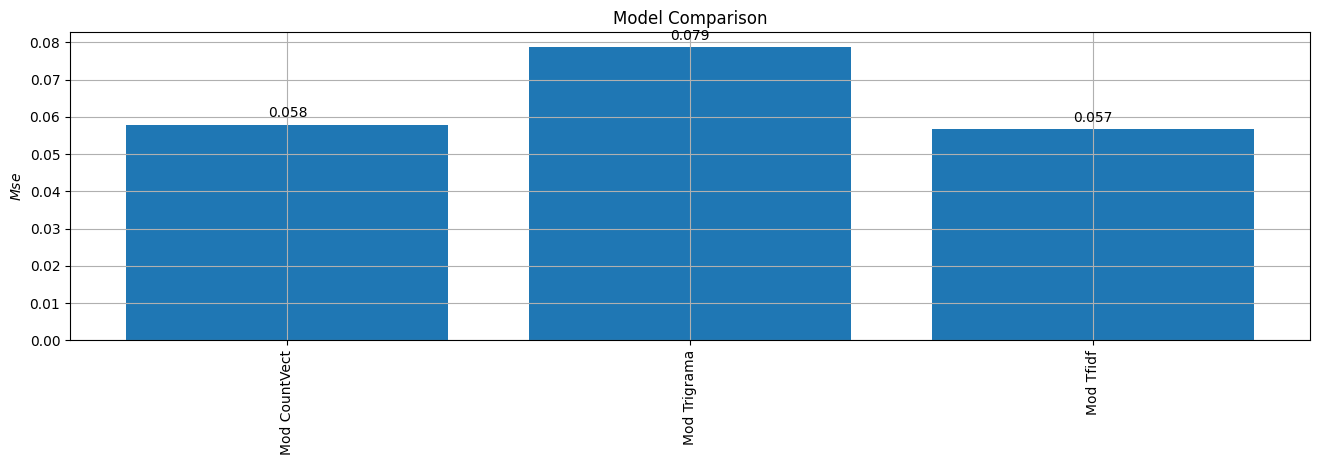

In [ ]:
# Celda 5
plt.figure(figsize=(16,4))
plt.bar(MSE.keys(),MSE.values() )
plt.ylabel('$Mse$')
plt.title('Model Comparison')
plt.grid()
  
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+ 0.002, round(y[i],3), ha = 'center')
        plt.xticks(rotation=90)

add_labels(MSE.keys(),list(MSE.values())) 

###**Conclusiones: **

En este caso para predecir si un comentario es Toxico o no el modelo de TfidfVectorizer es ligeramente mejor que el CountVectorizer y al de CountVectorizer con trigramas. 

Con respecto a las métricas:

- Cuando se compara el MSE de TfidfVectorizer de 0.05664, es ligeramente inferior que el de CountVectorizer de 0.05787, es decir que tiene un mejor desempeño en su predicción. Ambos modelos son muy superiores al compararlos con el modelo CountVectorizer con trigramas, que obtuvo un MSE de 0.07877. 

- Para confirmar o desvirtuar este resultado las métricas de Accuracy y AUC, muestran que sigue siendo mejor el modelo de TfidfVectorizer frente a CountVectorizer, y CountVectorizer y trigramas.

- Con respecto al accuracy el modelo TIF muestran un valor ligeramente superior de 0.9433 frente a un Accuracy de CountVectorizer de 0.9421 y CountVectorizer con trigramas de 0.9212.

- Al observar el AUC, estos valores son muy similires entre los modelos TfidVectorizer y CountVectorizer, al presentar resultados de 0.9377 y 0.9059 respectivamente y muy superior al de CountVectorizer con trigramas que registro un AUC de 0.6952.

- Aunque el desempeño de acuerdo a las métricas es levemente superior por parte del modelo TfidfVectorizer frente al CountVectorizer, y muy superior al de CountVectorizer con trigramas. Para que estos resultados sean contundentes, es necesario realizar un mayor número de pruebas y evaluar los modelos de TfidVectorizer y CountVectorizer con otros conjuntos de datos.